# Creating GUI for Disease Prediction based on Symptoms based on Keras BiLSTM

This project aims to create a GUI that is able to receive inputs in form of symptoms. It will be able to predict the disease and shows how confident the prediction is.

DISCLAIMER: Do not use this as a reference for your medical issue! This project is only for educational purposes!

In [1]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Bidirectional, Activation, SpatialDropout1D, Dropout
from tensorflow.keras.layers import Embedding
import keras.backend as K
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display, clear_output

In [2]:
#load data into dataset
df = pd.read_csv("dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking missing values
df.isna().any()

Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4      True
Symptom_5      True
Symptom_6      True
Symptom_7      True
Symptom_8      True
Symptom_9      True
Symptom_10     True
Symptom_11     True
Symptom_12     True
Symptom_13     True
Symptom_14     True
Symptom_15     True
Symptom_16     True
Symptom_17     True
dtype: bool

In [4]:
#Removing space character on symptoms
for i in range(0,len(df)):
    for j in range(1, 18):
        try:
            df.iloc[i,j] = df.iloc[i,j].replace(" ", "")
        except:
            pass
df = df.fillna(" 0")

In [6]:
#Encoding the symptoms to numbers
a = (pd.unique(df.iloc[:,1:].values.ravel('K')))
a.sort()
for i in range(0,len(a)):
    df = df.replace(a[i], i)

In [7]:
#Enconding the diseases to number
b = (pd.unique(df.iloc[:,0].values.ravel('K')))
b.sort()
for i in range(0,len(b)):
    df = df.replace(b[i], i)

In [8]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,56,101,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,101,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,56,74,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,56,101,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,56,101,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
y_temp = (df.iloc[:,0]).astype(int)
X_temp = (df.iloc[:,1:]).astype(int)

In [10]:
X = []
for i in range(0,len(X_temp)):
    temp = []
    for j in range(0,len(X_temp.iloc[i])):
        temp.append(X_temp.iloc[i,j])
    temp = np.flip(temp)
    X.append(temp)
    
X = np.array(X)

In [11]:
ohed = pd.get_dummies(y_temp, columns = ['Disease'])
y = []
for i in range(0,len(ohed)):
    temp = []
    for j in range(0,len(ohed.iloc[i])):
        temp.append(ohed.iloc[i,j])
    y.append(temp)
    
y = np.array(y)

In [12]:
#Splitting train test 85:15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=26)

In [13]:
total, length = X_train.shape

In [14]:
#Creating the model
model = Sequential()
model.add(Embedding(total, 128, input_length = length))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.compile(loss=['categorical_crossentropy'] , optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 128)           535296    
                                                                 
 spatial_dropout1d (SpatialD  (None, 17, 128)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 17, 128)          98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 17, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [15]:
#Model training
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=100,epochs=10)

Epoch 1/10
42/42 [==============================] - 8s 71ms/step - loss: 3.5034 - accuracy: 0.1248 - val_loss: 2.8442 - val_accuracy: 0.2547
Epoch 2/10
42/42 [==============================] - 2s 39ms/step - loss: 2.0471 - accuracy: 0.4909 - val_loss: 1.1089 - val_accuracy: 0.8713
Epoch 3/10
42/42 [==============================] - 2s 40ms/step - loss: 0.8982 - accuracy: 0.8620 - val_loss: 0.4236 - val_accuracy: 1.0000
Epoch 4/10
42/42 [==============================] - 2s 40ms/step - loss: 0.4166 - accuracy: 0.9684 - val_loss: 0.1951 - val_accuracy: 1.0000
Epoch 5/10
42/42 [==============================] - 2s 40ms/step - loss: 0.2290 - accuracy: 0.9931 - val_loss: 0.1080 - val_accuracy: 1.0000
Epoch 6/10
42/42 [==============================] - 2s 40ms/step - loss: 0.1484 - accuracy: 0.9974 - val_loss: 0.0683 - val_accuracy: 1.0000
Epoch 7/10
42/42 [==============================] - 2s 41ms/step - loss: 0.1023 - accuracy: 0.9986 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 8/10
42

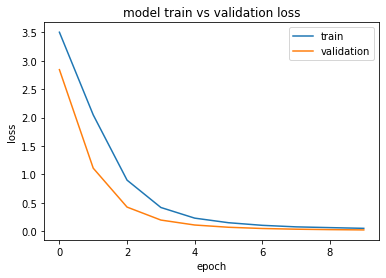

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

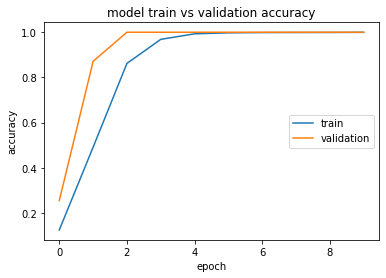

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()

While this model looks like it is overfitting, it is actually not overfit in my opinion. Because of the nature of the dataset, each diseases have their own unique set of symptoms which makes the model could reach ~99% accuracy and loss almost of 0.

## GUI

In [18]:
#Load description dataset
dc = pd.read_csv("description.csv")
dc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [20]:
df = pd.read_csv("dataset.csv")
df = df.fillna(" None")
c = (pd.unique(df.iloc[:,1:].values.ravel('K')))
for i in range(0,len(c)):
    c[i] = c[i].replace(" ", "")
    c[i] = c[i].replace("_", " ")
    try:
        c[i] = c[i].capitalize()
    except:
        pass
c = c[c != "None"]
c = np.append(c, "--Select symptom--")
c.sort()

In [22]:
out = widgets.Output()

sym1 = widgets.Dropdown(options=c)
sym2 = widgets.Dropdown(options=c)
sym3 = widgets.Dropdown(options=c)
sym4 = widgets.Dropdown(options=c)
sym5 = widgets.Dropdown(options=c)
sym6 = widgets.Dropdown(options=c)

btn = widgets.Button(description="PREDICT")
hbox = widgets.HBox([widgets.VBox([sym1, sym2]), widgets.VBox([sym3, sym4]), widgets.VBox([sym5, sym6])])

display(hbox, btn, out)

def on_button_clicked(btn_click):
    with out:
        ctr = 0
        clear_output()
        result = [sym1.value, sym2.value, sym3.value, sym4.value, sym5.value, sym6.value]
        for i in range(0, 6):
            if result[i] == '--Select symptom--':
                result[i] = -1
                ctr += 1
            else:
                for j in range(0, len(c)):
                    if(result[i] == c[j]):
                        result[i] = j
                        
        for i in range(0, ctr):
            result.remove(-1)

        for i in range(0, 11 + ctr):
            result.append(0)
            
        result.reverse()

        pred = model.predict([result])
        for i in range(0,len(b)):
            if(pred.argmax(1)[0] == i):
                clear_output()
                print("================================\nPredicted disease: {} || Confidence: {:.2f}%".format(b[i], (pred[0][i])*100))
                try:
                    print("Description: \n{}".format(dc.iloc[(dc[dc['Disease']==b[i]].index.values[0]), 1]))
                    break
                except:
                    print("Description: **NOT PROVIDED**")
                    break
    
btn.on_click(on_button_clicked)

Button(description='PREDICT', style=ButtonStyle())

Output()

#### Source
Disease Symptom Prediction
https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset